<div style="border:solid green 3px; padding: 20px">
	
<b>Привет, Ольга! :)</b>
	
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
	
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
	
	
Для твоего удобства, я буду выделять свои комментарии следующим образом:
	
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
	
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
	
</div>
	
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>
	
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
	
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
	
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


**Вывод**

После беглого просмотра информации о таблице можно сказать следующее:

- В таблице есть данные о семейном положении и количестве детей клиента, информация о доходах и цели кредита, а также колонка касающаяся задолженности по кредиту. Данных из этой таблицы может быть достаточно для решения поставленной задачи. Также в таблице представлена другая информация о клиентах банка.


- В таблице 12 колонок. Колонки 'education' и 'family_status' продублированы колонками 'education_id' и 'family_status_id' соответственно. Это очень удобно, что колонки с текстовам описанием продублированы условными обозначениями. Уже из первых строк таблицы видно, что строковые значения в этих колонках имеют разный формат, это нужно учесть при проверке соответствия условных обозначений и описания. Также данные строкового типа со свободным форматированием есть в колонках о типе дохода и цели кредита.


- Тип данных для колонок в большинстве случаев соответствует названию. Стоит отметить что в колонке 'days_employed' данные типа float, хотя количество дней скорее всего предполагает целое число. В таблице данные из этой колонки выглядят некорректными, есть отрицательные и положительные числа очень разных порядков. Колонка 'total_income' тоже вызывает вопросы, скорее всего это результат деления и можно округлить числа до целых или даже разделить на категории. 


- В таблице есть пропущенные значения в колонках 'days_employed' и 'total_income', причем количество пропусков в этих колонках одинаковое. Скорее всего пропуски в этих двух колонках взаимосвязаны. Пропущено по паре тысяч значений в этих столбцах, что составляет около 10% от общей информации, это большая часть, игнорировать строки с пропусками не следует.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 
<br>Всё верно! С выводами согласен)
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> 
<br>Что можно обнаружить ещё при первичном анализе данных:    
<br>- столбец children - отрицательные значения и выбросы (20 детей)
<br>- столбец days_employed - отрицательные значения, выбросы
<br>- столбец dob_years - нулевые значения
<br>- столбец gender - содержит артефакт
<br>- столбец purpose - много аналогичных формулировок, которые можно категоризировать
<br>Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет.
<br>Во время первичного анализа данных, часто может помочь метод describe(). Он покажет тебе min/mean/max значения в каждом столбце и многое другое)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Спасибо за подсказку метода describe(). Попробую его использовать.
</div>

In [2]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Получилась очень удобная таблица для оценки данных! Например, видно, что большинство заемщиков не имеет детей. Также очевидно что почти все значения стажа отрицательны, а положительные значительно больше отрицательных по модулю. Более половины заемщиков имеют среднее образование, а средний возраст клиентов 43 года. Всего среди клиентов банка около 8% должников.
<br>    
<br>В общем, я старалась не делать лишнюю работу, если есть точная задача и дедлайн, растекаться мыслью по древу не всегда полезно. Например, информация о гендере заемщика лично на мой вкус важна, особенно когда речь идет также о семейном положении и наличии детей. Однако, в тз такого вопроса не было, и обработка столбца 'gender' - лишние человекочасы и вычислительные процедуры.
<br>Поправьте меня, если я в корне не права.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Конечно же ты права) Проект учебный, а все мы разные и обладаем разным свободным временем и подходом к учебе. Кому-то лишь бы сдать, а кто-то хочет докопаться до самых мелочей. Для этого и существуют жёлтые комментарии) Я показал тебе, что ещё можно найти и как, а как с этим знанием поступать решать только тебе! Конечно, это хорошо когда вы отрабатываете их, но если нет, то никто вас судить не будет) 
</div>

## Шаг 2. Предобработка данных

### Обработка пропусков

В таблице пропущены данные в колонках 'days_employed' и 'total_income'. Посмотрим, что в строках с пропущенными данными. 

In [3]:
data[data['days_employed'].isna()].head()
#data.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Похоже пропуски в этих колонках взаимосвязаны. Скорее всего пропуски возникают в случае отсутствия данных о трудовом стаже. Формат значений в колонке 'total_income' позволяет предположить, что эти числа  являются результатом математических действий. Если в этих математических действиях участвует значение из колонки'days_employed', то пропущенное значение в колонке с рабочим стажем приведет к пропуску в колонке с месячным доходом. У нас нет необходимости выяснять эту взаимосвязь точно, так как эта информация не принципиальна для нашей задачи.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Пропуски будем заполнять по процедуре, предложенной ревьюером. Рассчитаем медианное значение дохода для каждой группы занятости, заполним пропуски в колонке 'total_income' этими значениями.
</div>

In [4]:
income_type_median = data.groupby('income_type')['total_income'].median()
income_type_median

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

In [5]:
def fill_income(income_type):
    return income_type_median[income_type]

data['total_income'] = data['total_income'].fillna(data['income_type'].apply(fill_income))

In [6]:
data[data['days_employed'].isna()].tail()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,172357.950966,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,142594.396847,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,172357.950966,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,142594.396847,строительство жилой недвижимости
21510,2,NaN,28,среднее,1,женат / замужем,0,F,сотрудник,0,142594.396847,приобретение автомобиля


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Заполним пропуски в колонке 'days_employed'.
<br>Сначала исследуем имеющиеся данные. Рассмотрим значения отрицательных и положительных чисел отдельно. Будем ориентироваться на 15 000, или около 40 лет трудового стажа.
<br>Очевидно, что отрицательные числа из колонки 'days_employed' имеют приемлемые для трудового стажа значения. У них мы просто изменим знак. Положительные числа нуждаются в дополнительной обработке, так как диапазон их значений колеблется от 330 до 400 тысяч дней, то есть в среднем около 1000 лет. Понятно, что записи о приеме на работу тысячелетней давности сложно проверить на подлинность, поэтому предположим, что эти значения случайно оказались домножены на количество часов в сутках. При делении значений на 24 действительно получаются приемлемые значения около 15 000.
<br>Заменим положительные значения в колонке 'days_employed' результатом деления на 24. Затем превратим все значения в положительные методом abs(). Колонка будет готова для дальнейшей работы.
<br>Теперь заполним пропуски в колонке медианным значением трудового стажа. По хорошему, нужно разделить клиентов на группы по возрасту, и брать медианное значение для возрастной группы. В данном случае ограничимся средней температурой по больнице, так как не стоит задачи выявления связи между трудовым стажем и выплатой кредита в срок.  
</div>

In [7]:
#data['days_employed'] = data['days_employed']/3600
data[data['days_employed']<0]['days_employed'].describe()

count    15906.000000
mean     -2353.015932
std       2304.243851
min     -18388.949901
25%      -3157.480084
50%      -1630.019381
75%       -756.371964
max        -24.141633
Name: days_employed, dtype: float64

In [8]:
data[data['days_employed']<-15000]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
1539,0,-15785.678893,59,высшее,0,Не женат / не замужем,4,F,сотрудник,0,119563.851852,операции с коммерческой недвижимостью
3974,0,-15835.725775,64,среднее,1,гражданский брак,1,F,компаньон,0,96858.531436,сыграть свадьбу
4299,0,-17615.563266,61,среднее,1,женат / замужем,0,F,компаньон,0,122560.741753,покупка жилья
4321,0,-15773.061335,61,среднее,1,гражданский брак,1,F,сотрудник,0,205868.585780,свадьба
5581,0,-15079.216069,55,среднее,1,женат / замужем,0,F,госслужащий,0,178761.373413,операции с жильем
7329,0,-16593.472817,60,высшее,0,женат / замужем,0,F,сотрудник,0,124697.846781,заняться высшим образованием
7731,0,-15618.063786,64,среднее,1,женат / замужем,0,F,компаньон,0,296525.358574,высшее образование
15675,0,-15410.040779,65,высшее,0,женат / замужем,0,F,сотрудник,0,188800.068859,покупка жилой недвижимости
16335,1,-18388.949901,61,среднее,1,женат / замужем,0,F,сотрудник,0,186178.934089,операции с недвижимостью
16825,0,-16119.687737,64,среднее,1,женат / замужем,0,F,сотрудник,0,91527.685995,покупка жилой недвижимости


Действительно, клиенты, имеющие свыше 40 лет трудового стажа, работают, несмотря на пенсионный возраст (почти все - женщины старше 55). Большинство имеют среднее образование, а значит работают с 18 лет. Выглядит правдоподобно. 

In [9]:
data[data['days_employed']>0]['days_employed'].describe()

count      3445.000000
mean     365004.309916
std       21075.016396
min      328728.720605
25%      346639.413916
50%      365213.306266
75%      383246.444219
max      401755.400475
Name: days_employed, dtype: float64

In [10]:
data.loc[data['days_employed']>0,['days_employed']] = data.loc[data['days_employed']>0,['days_employed']]/24
data[data['days_employed']>0]['days_employed'].describe()

count     3445.000000
mean     15208.512913
std        878.125683
min      13697.030025
25%      14443.308913
50%      15217.221094
75%      15968.601842
max      16739.808353
Name: days_employed, dtype: float64

In [11]:
data['days_employed'] = data['days_employed'].abs()
data['days_employed'].describe()

count    19351.000000
mean      4641.641176
std       5355.964289
min         24.141633
25%        927.009265
50%       2194.220567
75%       5537.882441
max      18388.949901
Name: days_employed, dtype: float64

In [12]:
data['days_employed'] = data['days_employed'].fillna(data['days_employed'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

Теперь пропуски в исходных данных не помешают нашей работе.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> 
<br>Среднее применить можно, но лучше будет взять медиану, так как она более устойчива к выбросам. Применять "общее" среднее для всех в столбце total_income не совсем правильно. У нас есть разные группы занятости и следует рассчитать среднее для каждой группы, а потом уже им заполнить пропуски внутри этого типа занятости.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Спасибо за комментарий. Я переделала весь пункт. Комментарии к коду собрала в два общих по количеству столбцов, с которыми работала. То есть большой синий комментарий, а ниже код к нему, чтобы не делать миллион 'комментариев студента'. Основные изменения собраны именно в синие комментарии.
<br>Кстати, подскажите, какой формат работы лучше - комментарий к каждой ячейке кода, или большой план работы в начале и общий вывод в конце. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Да ты проделала доп. работы на ещё один проект! Это достойно восхищения 👏🏻👏🏻👏🏻
<br>По комментариям - лучше что-то среднее. Перед каждым небольшим шагом делать описание и писать свои рассуждения(там где это нужно), а в конце этого шага делать выводы.
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> 
<br>Так как столбец days_employed нам не нужен, то делать с ним что-то не обязательно, но я расскажу как его можно было бы обработать более оптимально:
<br>- отрицательные значения взять по модулю
<br>- пропуски заполнить медианами по возрасту
<br>- аномально высокие значения разделить на 24 и тогда получится вполне себе адекватный стаж (в реальной задаче, прежде чем такое делать, стоит уточнить могла ли быть такая ошибка при выгрузке/заполнении данных)    
</div>

### Замена типа данных

Изменим тип данных в колонке 'total_income'. Значениями после запятой можно пренебречь, и перезаписать данные в целочисленном формате. Данные типа int потребуют меньше времени для обработки, чем данные типа float, имеющие дополнительные шесть знаков после запятой. Воспользуемся методом astype() для изменения типа данных. Мы можем воспользоваться этим методом, так как колонка содержит только данные типа float, в ином случае нам потребовался бы метод pd.to_numeric(). 

In [13]:
data['total_income'] = data['total_income'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


**Вывод**

Пусть месячный доход будет выражен в целых числах. Нам потребуется далее иметь дело с этими данными, и вычисления с участием целочисленных значений будут производиться быстрее. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 
<br>Всё верно!
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> 
<br>Что можно сделать ещё для удобства: 
<br>- изменить тип данных в столбце со стажем    
<br>- разделить количество дней стажа на 365, получив таким образом стаж в годах
<br>- разделить ежемесячный доход на 1000, получив значения в тысячах. В данном случае точность до сотен рублей нам не нужна, а значения будут выглядеть аккуратнее
</div>

### Обработка дубликатов

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Приведем в порядок колонку 'education'. Формат записи в этой колонку не унифицирован, что мы отметили еще при беглом осмотре таблицы. Это может привести к ошибкам при группировке по этой колонке или работе с колонками 'education' и 'education_id' одновременно.
<br>Отметим, что значения различаются лишь регистром, то есть нужно перевести все буквы в нижний регистр. С этим справится метод lower().
<br>После обработки столбца 'education' удалим дублирующие строки методом drop_dublicates().
</div>

In [14]:
data.groupby('education_id')['education'].unique()

education_id
0                             [высшее, ВЫСШЕЕ, Высшее]
1                          [среднее, Среднее, СРЕДНЕЕ]
2    [неоконченное высшее, НЕОКОНЧЕННОЕ ВЫСШЕЕ, Нео...
3                    [начальное, НАЧАЛЬНОЕ, Начальное]
4     [Ученая степень, УЧЕНАЯ СТЕПЕНЬ, ученая степень]
Name: education, dtype: object

In [15]:
data['education'] = data['education'].str.lower()
data.groupby('education_id')['education'].unique()

education_id
0                 [высшее]
1                [среднее]
2    [неоконченное высшее]
3              [начальное]
4         [ученая степень]
Name: education, dtype: object

Проверим, нет ли дублирующихся строк.

In [16]:
data.duplicated().sum()

71

В таблице 71 строка-дубликат, эти строки повторяют уже имеющиеся данные. Строки полностью дублируются при неправильном копировании данных. Такие строки нам не нужны, мы можем их удалить и переписать нумерацию строк. для избавления от явных дубликатов есть встроенный метод drop_duplicates(), использование встроенных методов - всегда оптимальный способ решения задачи.

Удалим дубли методом drop_duplicates() и обновим нумерацию строк методом reset_index(). Проверим, что явных дубликатов не осталось.

In [17]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

Теперь в таблице 0 явных дубликатов.

**Вывод**

Мы избавились от 71 строки-дубликата. Также исправлены значения в колонке 'education', все значения приведены к общему формату. Каждому условному обозначению в колонке 'education_id' соответствует одно значение из колонки 'education'.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> 
<br>Это правильное решение, но вот основное количество дубликатов находится в столбце education. С ними нужно поработать)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Спасибо за комментарий. Я добавила в пункт обработку строки 'education'. Комментарии к коду собрала в общий.  Основные изменения собраны в синий комментарии, незначительные исправления по ходу действия не выносила в отдельные синие комментарии.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Тут всё супер! Добавить нечего)
</div>

### Лемматизация

Среди поставленных задач есть вопрос о влиянии цели кредита на его возврат. Рассмотрим, на какие же цели берут кредит в том банке.

In [18]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Цели обращения за кредитом указаны в свободной форме, что усложняет работу. В списке можно выделить несколько групп, например, цели 'покупка жилья' и 'покупка жилой недвижимости' можно объединить в одну группу. 

Получим перечень слов, встречающихся в этой колонке. Для этого воспользуемся методом лемматизации. Данный метод возвращает слова в их словарной форме. Такой метод значительно облегчает поиск ключевых слов в строках. Такде воспользуемся методои Counter чтобы оценить встречаемость слов и в случае ошибок в написании ключевых слов сразу их заметить.

In [19]:
from pymystem3 import Mystem
m = Mystem()
from collections import Counter
lemmas = m.lemmatize(' '.join(data['purpose'].unique()))
Counter(lemmas)

Counter({'покупка': 10,
         ' ': 96,
         'жилье': 7,
         'приобретение': 1,
         'автомобиль': 9,
         'дополнительный': 2,
         'образование': 9,
         'сыграть': 1,
         'свадьба': 3,
         'операция': 4,
         'с': 5,
         'на': 4,
         'проведение': 1,
         'для': 2,
         'семья': 1,
         'недвижимость': 10,
         'коммерческий': 2,
         'жилой': 2,
         'строительство': 3,
         'собственный': 1,
         'подержать': 2,
         'свой': 4,
         'со': 1,
         'заниматься': 2,
         'сделка': 2,
         'получение': 3,
         'высокий': 3,
         'профильный': 1,
         'сдача': 1,
         'ремонт': 1,
         '\n': 1})

**Вывод**

Мы получили перечень слов в их словарной форме из свободно сформулированных целей кредита. Среди них найдем ключевые слова для разделения данных на категории по цели кредита.

### Категоризация данных

Разделим данные из таблицы на категории в зависимости от цели кредита. Выделим четыре категории - недвижимость, автомобиль, обучение и свадьба. Воспользуемся методом лемматизации для облегчения поиска ключевых слов в данных из колонки 'purpose'.

In [20]:
def purpose_group(purpose):
    if 'автомобиль' in m.lemmatize(purpose):
        return 'автомобиль'
    elif 'свадьба' in m.lemmatize(purpose):
        return 'свадьба'
    elif 'образование' in m.lemmatize(purpose):
        return 'образование'
    elif 'жилье' or 'недвижимость' in m.lemmatize(purpose):
        return 'недвижимость'
    else:
        return 'цель неопределена'
    
    
data['purpose_group'] = data['purpose'].apply(purpose_group)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_group
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба


Проверим, остались ли строки, в которых цель не относится ни к одной из четырех категорий.

In [21]:
data[data['purpose']=='цель неопределена']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_group


Строк в категории 'цель неоределена' нет, значит, мы распределили все данные на четыре категории.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 
<br>Цели кредита категоризированы правильно! 👍
</div>

Также разделим данные на четыре категории в зависимости от суммы ежемесячного дохода. Для этого определим медианные значения дохода.

In [22]:
median_income = data['total_income'].median()
median_income

142594.0

In [23]:
median_low = data[data['total_income'] < median_income]['total_income'].median()
median_low

103460.0

In [24]:
median_high = data[data['total_income'] > median_income]['total_income'].median()
median_high

196593.0

Определим доход ниже median_low низким, доход выше median_high - высоким, а значения дохода около медианного - выше и ниже среднего соответственно. Таким методом мы произведем категоризацию данных по уровню дохода.

Добавим в данные колонку с категориями дохода.

In [25]:
def income_group(income):
    if income<median_low:
        return 'низкий доход'
    elif income<=median_income:
        return 'доход ниже среднего'
    elif income<median_high:
        return 'доход выше среднего'
    elif income>=median_high:
        return 'высокий доход'
    else:
        return 'доход неопределен'
    
    
data['income_group'] = data['total_income'].apply(income_group)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_group,income_group
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,высокий доход
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,доход ниже среднего
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,доход выше среднего
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,высокий доход
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,доход выше среднего


**Вывод**

Мы разделили все данные на четыре категории по цели кредита: 'недвижимость', 'автомобиль', 'свадьба', 'образование'. Также выделили четыре группы заемщиков в зависимости от их дохода.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 
<br>Ты правильно и логично выделила категории по уровню дохода. В реальной задаче лучше уточнить у заказчика или коллег как лучше это будет сделать
</div>

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [26]:
data.groupby('children')['debt'].mean()

children
-1     0.021277
 0     0.075438
 1     0.092346
 2     0.094542
 3     0.081818
 4     0.097561
 5     0.000000
 20    0.105263
Name: debt, dtype: float64

Проявилась незамеченная ранее ошибка в данных. Часть заемщиков имеет -1 ребенка, некоторые заемщики имеют 20 детей. Посмотрим на данные внимательнее.

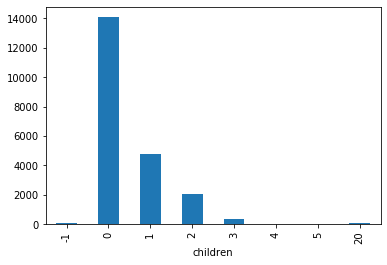

In [27]:
#import seaborn as sb
data.groupby('children')['debt'].count().plot.bar()

Согласно диаграмме, число ошибочных записей количества детей невелико. Очевидно, что 20 в графе количества детей тоже ошибка, как и -1, так как нет промежуточных значений между 5 и 20. Кроме того, случаев появления значения 20 заметно больше, чем 4 или 5. Статистически же маловероятно, что в банк обратилось больше клиентов, имеющих 20 детей, нежели клиентов с 4 или 5 детьми.

Таким образом, можно предположить, что появление значений -1 и 20 в колонке 'children' связяно с ошибкой ввода данных. Можно считать, что клиенты из этих строк имеют одного или два ребенка соответственно.

Отметим, что доли должников среди заемщиков с одним ребенком и с двумя детьми близки. Эти группы наиболее многочисленны среди заемщиков, имеющих детей. Опираясь на это можно сделать допущение, что количество детей не сильно влияет на возврат долга. 

Рассмотрим, как влияет наличие детей на возврат долга, на количество детей обращать внимания не будем.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 
<br>Ты абсолютно правильно сделала, что не стала выделять количество детей в отдельные категории. В  этом задании важно именно наличие или отсутствие
</div>

In [28]:
display('Доля должников среди заемщиков, не имеющих детей:')
display(data[data['children']==0]['debt'].mean().round(4))
display('Доля должников среди заемщиков, имеющих детей:')
display(data[(data['children']>0) & (data['children']<20)]['debt'].mean().round(4))

'Доля должников среди заемщиков, не имеющих детей:'

0.0754

'Доля должников среди заемщиков, имеющих детей:'

0.0924

**Вывод**

Прослеживается связь между наличием детей у заемщика и его способностью выплатить кредит вовремя. Около 9.2% заемщиков с детьми имеют задолженность, в то время как только 7,5% заемщиков без детей не смогли вовремя выплатить кредит. То есть для банка вероятность столкнуться с задолженностью при работе с клиентами, имеющими детей, более чем на 20% выше, чем при работе с бездетными клиентами.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 
<br>Верно! Клиенты без детей отдают кредиты вовремя чаще тех, у кого дети есть
</div>

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Узнаем, как соотносятся значения в колонках 'family_status_id' и 'family_status'. Значения в колонке 'family_status' имеют текстовый формат и могут содержать ошибки.

In [29]:
data.groupby('family_status_id')['family_status'].unique()

family_status_id
0          [женат / замужем]
1         [гражданский брак]
2           [вдовец / вдова]
3                [в разводе]
4    [Не женат / не замужем]
Name: family_status, dtype: object

Каждому условному обозначению из колонки 'family_status_id' соответствует единственное значение из колонки 'family_status' в приемлемом формате, достаточно понятном для работы. Посмотрим, как же зависит доля должников от семейного положения.

In [30]:
data.groupby('family_status')['debt'].mean()

family_status
Не женат / не замужем    0.097509
в разводе                0.071130
вдовец / вдова           0.065693
гражданский брак         0.093471
женат / замужем          0.075452
Name: debt, dtype: float64

Легко заметить, что доля должников выше среди заемщиков, не имевших зарегистрированного семейного положения, а именно в группах 'Не женат / не замужем' и 'гражданский брак'. Стоит отметить, что формулировка 'гражданский брак' весьма размыта и не имеет юридической силы. Зачастую клиент заявляет, что он(а) не в браке (категория 'Не женат / не замужем'), но при этом имеет сожителя или постоянного партнера. Объединим эти группы в одну и сравним с другими группами заемщиками.

In [31]:
display('Доля должников среди заемщиков, ранее состоявших в зарегистрированном браке:')
display (data[(data['family_status_id']>1) & (data['family_status_id']!=4)]['debt'].mean().round(4))
display('Доля должников среди заемщиков, состоящих в зарегистрированном браке на момент взятия кредита:')
display(data[data['family_status_id']==0]['debt'].mean().round(4))
display('Доля должников среди заемщиков, никогда не состоявших в зарегистрированном браке:')
display(data[(data['family_status_id']!=0) & (data['family_status_id']!=2)& (data['family_status_id']!=3)]['debt'].mean().round(4))

'Доля должников среди заемщиков, ранее состоявших в зарегистрированном браке:'

0.0687

'Доля должников среди заемщиков, состоящих в зарегистрированном браке на момент взятия кредита:'

0.0755

'Доля должников среди заемщиков, никогда не состоявших в зарегистрированном браке:'

0.0951

**Вывод**

Очевидно, связь между семейным положением и платежеспособностью заемщика есть. Согласно полученным данным, заемщики, никогда не состоявшие в зарегистрированных отношениях, в 9.5% случаев имеют задолженность по кредиту. Заемщики, состоящие в официальном браке, имеют задолженность в 7.6% случаев, заемщики, чей брак был завершен но различным причинам - только в 6.9% случаев. 

Если рассматривать более подробную статистику, наиболее надежными заемщиками являются вдовы/вдовцы, они имеют задолженность в 6.6% случаев. Наименее надежными являются заемщики, не имеющие партнера на данный момент и никогда не состоявшие в зарегистрированных отношениях. В таком случае доля должников составляет 9.8%. То есть доля должников среди одиноких, не бывавших в браке заемщиков почти в полтора раза выше, чем среди вдовцов.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 
<br>В точку! Идём дальше)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Сюда пристроила метод pivot_table() по требованию из финального комментария ревьюера. Все вопросы в шаге 3 одномерны, а метод pivot_table() предполагает двумерную зависимость.
<br> Посмотрела как  влияет семейное положение на выплату кредита в зависимости от пола заемщика, на мой вкус вопрос логичный. Можно еще пол и семейное положение вынести в индексы, и посчитать зависимость от дохода, но тогда количество клиентов в некоторых пунктов будет мало, и статистика будет сомнительной.
</div>

Чтобы быть последовательными, при рассмотрении вопросов о семейном положении и количестве детей, следует упомянуть также пол заемщика. Решать вопрос в лоб, считать долю должников среди мужчин и женщин было бы некорректно. Однако, в привязке к семейному положению изучить этот вопрос было бы интересно.
Сначала узнаем, кто же чаще берет кредит, мужчины или женщины.

In [32]:
data.groupby('gender')['debt'].count()

gender
F      14174
M       7279
XNA        1
Name: debt, dtype: int64

Среди клиентов банка в 2 раза больше женщин чем мужчин. Также мы столкнулись с одним непонятным значением 'XNA'. Заменим это значением на 'F', как на медианное значение всего столбца. Заметим, что единственное значение из суммарных двадцати с небольшим тысяч слабо повлияет на общую статистику.

Затем построим сводную таблицу, показывающую сколько должников среди мужчин и женщин в различном семейном положении.

In [33]:
data.loc[data['gender']=='XNA', 'gender'] = 'F'

In [34]:
data.pivot_table(index=['family_status'], columns='gender', values='debt', aggfunc=['mean', 'count'])

mean           count      
gender                        F         M     F     M
family_status                                        
Не женат / не замужем  0.068248  0.144311  1729  1081
в разводе              0.065171  0.092664   936   259
вдовец / вдова         0.057522  0.200000   904    55
гражданский брак       0.081869  0.118774  2846  1305
женат / замужем        0.068299  0.087574  7760  4579

В целом, женщины более надежные заемщики, особенно женщины в разводе или вдовы. Следует также заметить, что среди вдовых и разведенных клиентов банка, соотношение мужчин и женщин заметно отличается от общей статистики. Возможно из-за этого среди вдов оказалось 5.8% должников, а среди вдовцов почти в 4 раза больше, 20%. Вдовцов в таблицу попало только 55, это слишком маленькое число для адекватной статистики.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Классно получилось и очень наглядно! Комментарий про использование метода pivot_table, нужен больше для того, чтобы у вас был лишний способ отработать пройденный материал. А так, здесь можно обойтись и без него)
</div>

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Рассмотрим, сколько в среднем получают заемщики, имеющие задолженность по кредиту, и не имеющие долгов.

In [35]:
data.groupby('debt')['total_income'].mean()

debt
0    165687.076599
1    161158.393452
Name: total_income, dtype: float64

Следует заметить, что средние значения дохода у должников и надежных заемщиков отличаются незначительно.

Рассмотрим ситуацию подробнее. Изучим, как зарплатная группа влияет на способность заемщика выплатить кредит.

In [36]:
data.groupby('income_group')['debt'].mean()

income_group
высокий доход          0.071052
доход выше среднего    0.085580
доход ниже среднего    0.088299
низкий доход           0.078592
Name: debt, dtype: float64

**Вывод**

Мы нашли зависимость между доходом клиентов и выплатой кредита в срок. Заемщики с высоким доходом не выплачивают кредит в срок в 7.1% случаев. Заемщики с низким доходом чуть менее надежны, среди них 7.9% должников. Наименее надежны заемщики, чей доход близок к медианному, среди них около 8.7% должников. Таким образом, клиент с доходом, значительно превышающим медианный, будет наиболее надежным заемщиком. В то же время низкий доход не может являться поводом для отказа в кредите, так как заемщики с низким доходом более надежны, чем заемщики с медианным доходом.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 
<br>Самые недисциплинированые оказались заёмщики со средним уровнем дохода)
</div>

- Как разные цели кредита влияют на его возврат в срок?

Изучим, как цель кредита влияют на его возврат.

In [37]:
data.groupby('purpose_group')['debt'].mean()

purpose_group
автомобиль      0.093590
недвижимость    0.072334
образование     0.092200
свадьба         0.080034
Name: debt, dtype: float64

**Вывод**

Мы обнаружили, что цель кредита может повлиять на выплату кредита в срок. Кредит на операции с недвижимостью выплачивают наиболее исправно, в этой группе 7.2% должников. Наименее охотно выплачивают кредит на автомобиль, количество должников в этой группе 9.4%. То есть риск невыплаты кредита на автомобиль на 30% выше, чем для операций с недвижимостью. Кредит на образование не выплачивают вовремя в 9.2% случаев, кредит на свадьбу - в 8.0% случаев.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>
<br>Абсолютно верно! Возможно, это связано с тем, что к покупке жилья люди относятся более ответственно, так как сумма заемных средств и срок кредита, как правило гораздо выше чем в остальных категориях, а свадебные кредиты возвращаются за счет подаренных денег
</div>

## Шаг 4. Общий вывод

Получены данные о клиентах банка и их задолженности по кредиту. Информация в колонке о трудовом стаже повреждена и не поддается интерпретации. Остальная информация была изучена, обработана, и на ее основании сделаны следующие выводы.

Наличие детей, семейное положение, ежемесячный доход клиента, а также цель кредита в той или иной степени влияют на выплату кредита в срок.

Наибольшее влияние на выплату кредита оказывает семейное положение клиента. Разница в доле должников среди вдовцов и клиентов, не состоявших в браке, официальном или гражданском, составляет **50%** (6.6% должников против 9.8%). В общем, клиенты, не состоявшие в зарегистрированном браке, являются наименее надежной группой заемщиков, доля должников составляет 9.5%. Клиенты, чей брак завершен по тем или иным причинам, с большей вероятностью выплачивают кредит вовремя, доля должников 6.9%. Среди заемщиков, состоящих в официальном браке на момент взятия кредита, 7.6% должников.

Значительно на выплату в срок влияет цель взятия кредита. Клиенты, которые берут кредит на недвижимость не выплачивают кредит вовремя в 7.2% случаев. На **30%** больше должников (9.4%) в группе заемщиков, которые указали автомобиль в целях кредита.

Существует небольшая, но заметная зависимость между наличием детей и возвратом кредита в срок. Среди клиентов с детьми на **20%** больше должников, чем среди клиентов без детей, 9.2% и 7.5% соответственно. 

Такое же влияние на долю должников имеет доход клиента. Среди клиентов с высоким доходом 7.1% должников, а среди клиентов со средним уровнем дохода - 8.7%, то есть на **20%** больше. Клиенты с низким уровнем дохода оказались немного надежнее заемщиков со средним уровнем дохода, доля должников составила 7.9%. 

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера:</b> 
<br>Ты хорошо потрудилась, большая часть работы сделана, но остаётся внести следующие правки:
<br>- корректно провести замену пропусков в столбце total_income
<br>- убрать дубликаты в столбце education   
<br>- построй сводную таблицу используя метод pivot_table() для любого из вопросов в шаге 3    
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Замену пропусков в столбце total_income провела
<br>Дубликаты в столбце education убрала
<br>Метод pivot_table() пристроила после пункта о влиянии семейного положения на выплату кредита. Посмотрела как  влияет семейное положение на выплату кредита в зависимости от пола заемщика.
<br>    
<br>Спасибо за зеленые и желтые комментарии. Очень мотивирует знать, что делаешь какие-то части правильно!
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Ты проделала огромную работу! У тебя шикарнейшие выводы с хорошей аргументацией. Здорово, что ты пишешь свои рассуждения и предположения - это помогает видеть ход твоей мысли. Отдельно хочу выделить аккуратность и структурированность твоей работы. Дополнительный плюс за то, как ты проработала каждый желтый комментарий. Рад был поработать над проверкой твоего проекта! Желаю удачи в дальнейшем обучении! 😉
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.